# STAT - HANDS-ON

In this notebook we show how to solve the problem and exercise proposed during the lecture on the introduction to statistical inference

## We import some python module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special, optimize
from scipy.stats import chi2

# 1. The Monty Hall problem

Let's how to solve the 'Monty Hall problem' using the Bayes theorem

We firts define a function `BayesTheorem` whihc given a likelihoods and a priors gives the posterior

$ p( H_i | E ) = \frac{ P(E| H_i ) P( H_i) } { \sum_k  P(E| H_k ) P( H_k) }  = \; \frac{ \text{likeliohoods} \; \times \;  \text{priors} } { \sum \text{likeliohoods} \; \times \;  \text{priors}} $


In [32]:
def BayesTheorem( likelihoods, priors):
    normalization = np.sum( likelihoods * priors)
    return likelihoods * priors / normalization

We firts define the likelihood (see slides)

Text(0.5, 1.0, ' Likelihoods ')

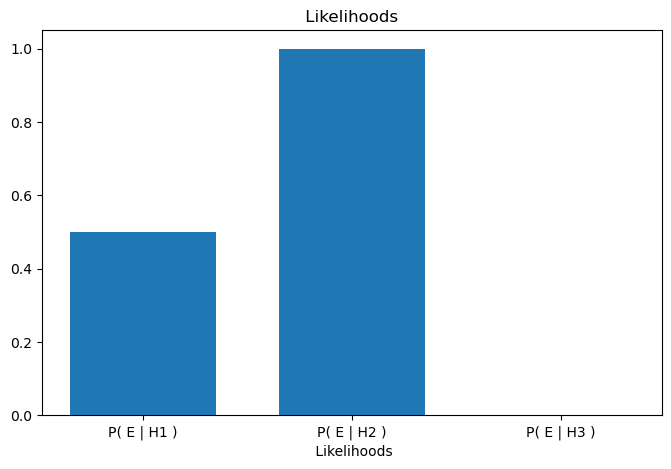

In [33]:
likelihoods = np.array( [ 0.5, 1, 0] )

counts = likelihoods
bins = np.arange( len(counts) + 1)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = ax.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)), rwidth=0.7)



ax.set_xticks( centroids)
ax.set_xticklabels( ["P( E | H1 )", "P( E | H2 )", "P( E | H3 )"])
ax.set_xlabel(" Likelihoods")
ax.set_title( " Likelihoods " )

Then the priors (see slides)

Text(0.5, 1.0, ' Prior Distribution ')

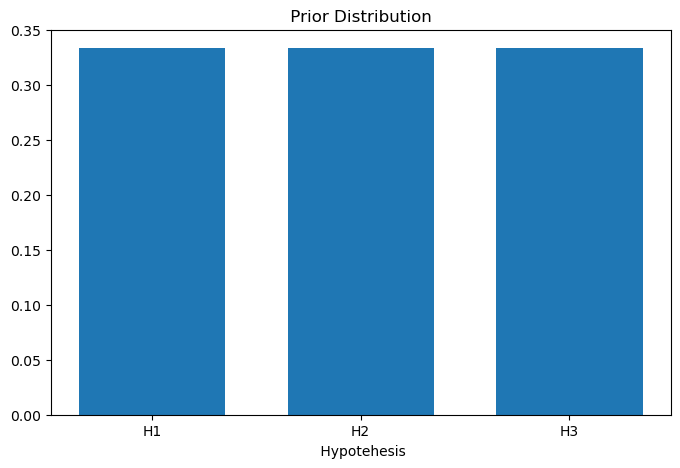

In [34]:
priors      = np.array( [1/3, 1/3, 1/3])

counts = priors
bins = np.arange( len(counts) + 1)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = ax.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)), rwidth=0.7)



ax.set_xticks( centroids)
ax.set_xticklabels( ["H1", "H2", "H3"])
ax.set_xlabel(" Hypotehesis")
ax.set_title( " Prior Distribution " )

Text(0.5, 1.0, ' Posterior Distribution ')

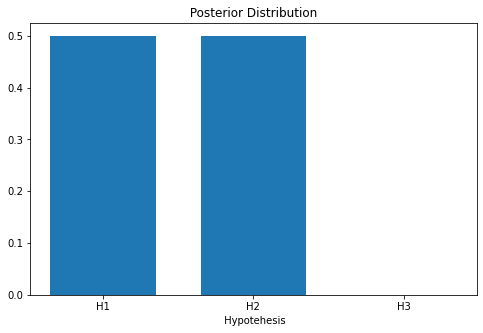

In [66]:
posterior   = BayesTheorem( likelihoods, priors) 

counts = posterior
bins = np.arange( len(counts) + 1)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = ax.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)), rwidth=0.7)



ax.set_xticks( centroids)
ax.set_xticklabels( ["H1", "H2", "H3"])
ax.set_xlabel(" Hypotehesis")
ax.set_title( " Posterior Distribution " )

### Excercises 
-  What if the TV-Show host did not know where the car is?
-  How the likelihoods change? What posterior do we get?

# 2.  Covid result test

Here we use the Bayes theorem to get the probablity that you have Covid-19 given a positve result from a rapid test

First, we define the prior to be sick. In in this case we choose an array of values from 0 to 1

In [35]:
p_sick     = np.linspace(0.0,1,1000)
p_not_sick = 1 - p_sick

We now define the **Sensitivity** and **Specificity** of the Covid rapid test

In [39]:
#sensitivity
Se  =  0.50
#specificity
Sp  =  0.97

Finally we apply the Bayes theorem (see slides)

In [40]:
p_sick_positive = 1/( 1 + (1-Sp)/Se * p_not_sick/p_sick)

/var/folders/cc/9yrg3qln5sq119c30p8bh2h00000gn/T/ipykernel_27133/931616044.py:1: RuntimeWarning: divide by zero encountered in divide
  p_sick_positive = 1/( 1 + (1-Sp)/Se * p_not_sick/p_sick)


Text(0.5, 0, ' $p( S  )$')

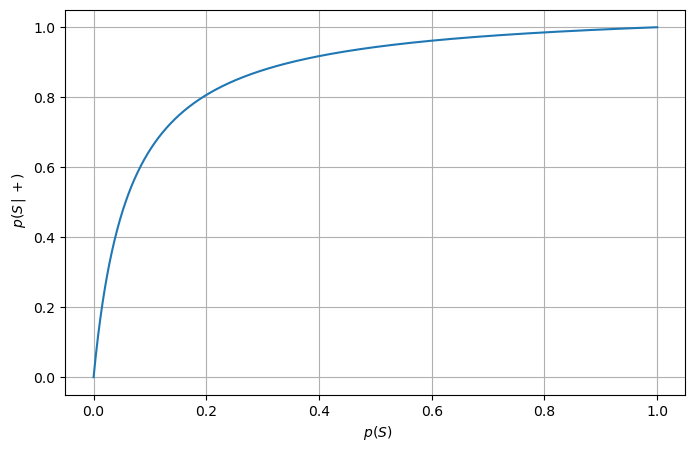

In [41]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)
ax.plot( p_sick, p_sick_positive)
ax.grid()
ax.set_ylabel(r" $p( S \,| \,  + )$")
ax.set_xlabel(r" $p( S  )$")

### Excercises
- Change the value of Sp. and Se. and see what happend
- Assuming a prior of being sick of 0.1, if I perform another test, after having being tested positive, and I test again positive. What is the probability that I am sick?

# 3. "Sheep" example

We consider the 'sheep' example (see slides) in which we have 2 models with different prediction on the percentage of balck sheep in the population

For the first hypothesis

In [43]:
# Percentage of black sheep accorinding to the model
p   = 0.01

For the alternative one

In [42]:
# Percentage of black sheep accorinding to the alternative model
p2  = 0.02

We then perform an observation on `n` sheeps observing a total of `n_black` balck sheep

In [44]:
# toale number of observed sheep
n  = 1000
# number of obseved black sheep
n_black = 20

What do the models tell us about the number of balck sheep we should obseved

Text(0, 0.5, 'PMF')

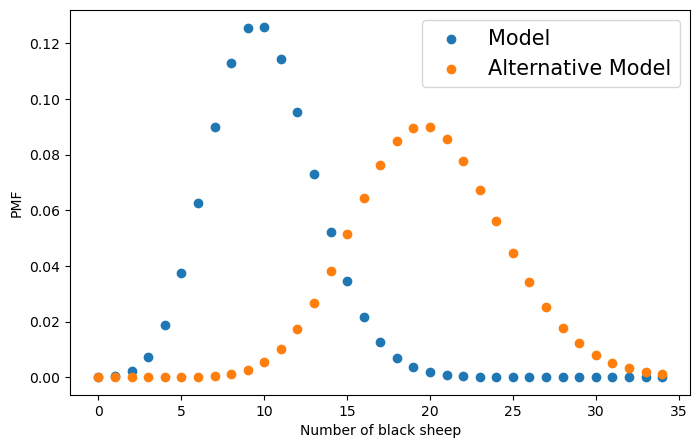

In [46]:
y = range(0,35)
y = [stats.binom.pmf( i, n,p) for i in x ]
y2 = [stats.binom.pmf( i, n,p2) for i in x ]

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

ax.scatter(x,y, label = "Model")
ax.scatter(x,y2, label = "Alternative Model")
ax.legend(fontsize=15)
ax.set_xlabel("Number of black sheep")
ax.set_ylabel("PMF")

Which model is more luckly to be true? Let's try to quantify it

### Bayes's answer

In [47]:
likelihood  = stats.binom.pmf( n_black, n,p)
print( " p( D | M )     = ", likelihood)
likelihood2 = stats.binom.pmf( n_black, n,p2)
print( " p( D | bar_M ) = ", likelihood2)


 p( D | M )     =  0.0017918782400182188
 p( D | bar_M ) =  0.08973706929554043


In [48]:
BF = likelihood/likelihood2
BF

0.019968094056168024

The first hypothesis is disfavored, i.e. it is less likely to be true relative to the alternative one

### Frequentist's answer

In [49]:
pvalue = 1 - stats.binom.cdf( 20, n,p)
pvalue

0.0014964815477092053

In [50]:
pvalue = 1 - np.sum([stats.binom.pmf( i, n,p) for i in np.arange(0,21,1)])
pvalue

0.0014964815477102045

In [51]:
special.erfinv( 1 - pvalue ) * np.sqrt(2)

3.1753649631295957

The first hypothesis is excluded at 3.2 sigmas

### Excercises
- Redo everything assuming that 5 sheep were observed

# 4. Powerful statistic

This is how a powerfull statistic should look like!

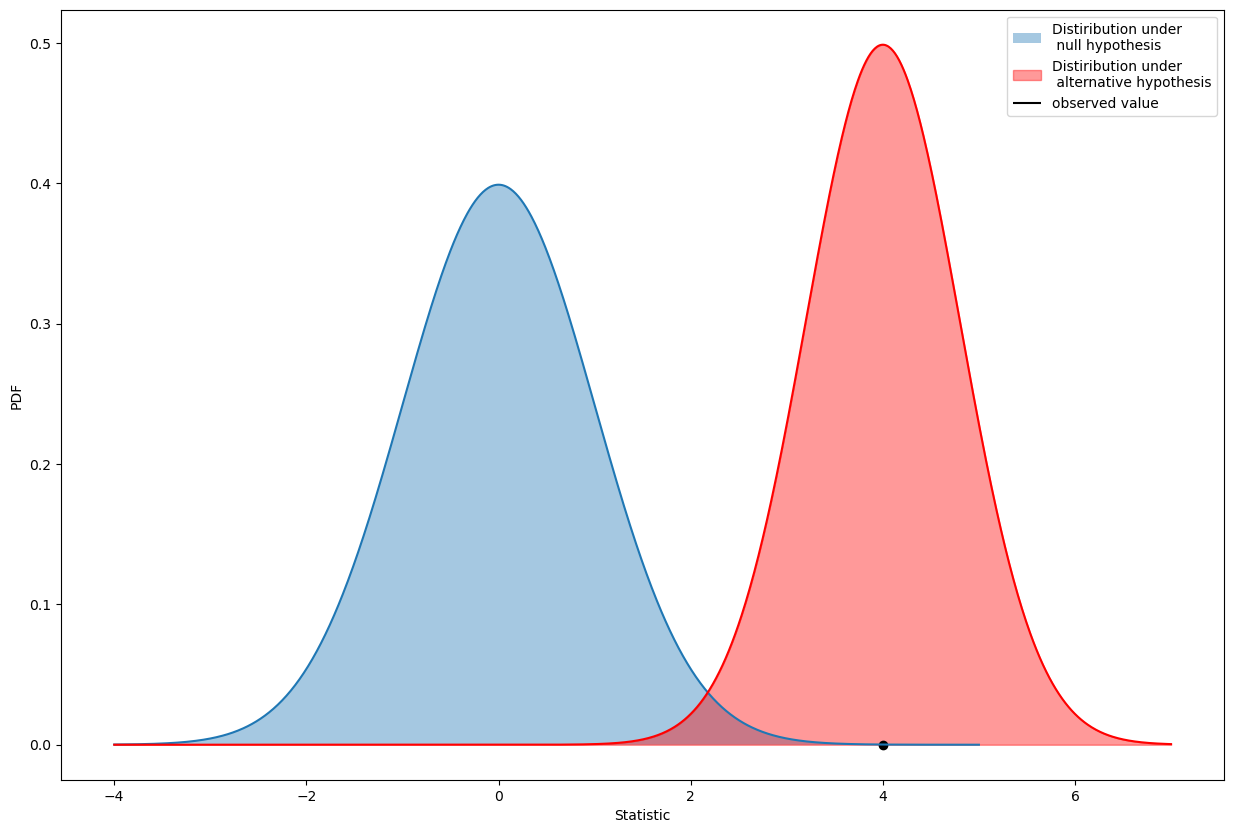

In [52]:
fig, ax = plt.subplots(figsize=(15,10),nrows=1, ncols=1)

x = np.linspace( -4, 5, 1000)
y = stats.norm.pdf( x, 0, 1)
plt.plot( x,y)
ax.fill_between(x,0,y,alpha=0.4, label="Distiribution under\n null hypothesis" )

x = np.linspace( -4, 7, 1000)
y = stats.norm.pdf( x, 4, 0.8)
plt.plot( x,y,  c='red')
ax.fill_between(x,0,y,alpha=0.4, color='red',label="Distiribution under\n alternative hypothesis" )

ax.set_xlabel("Statistic")
ax.set_ylabel("PDF")

xs = 4
ys = stats.norm.pdf( xs, 0, 1)
ax.vlines(xs, 0, ys , color='black', label="observed value")
ax.scatter(xs,ys, color='black')

#ax.set_yscale("log")

ax.legend(loc='best')

### Escercise
- What is the 'power' of the statistic above? (assume a rejection threshold of 5)

# 5. "Higg's discovery" toy model

We firts define our Toy Model, which depends on a signle paramter `a`

- No uncertainty on the observable $x$

$ x = x_{obs} $

- The dependent variable $y$ is given by

$ y = q + m \cdot x  + 10^3 \cdot a \cdot \mathcal{N}(x | \mu=50, \sigma=8) $

- The uncertainty on $y$ is given by

$ y_{obs} \sim \mathcal{N}(\mu=y, \sigma=70) $

In [3]:
def model(x,a):
    m = -6
    q = 720
    return m*x + q + a*1e3*stats.norm.pdf( x, 50, 8)

# function for simulating an observation of npoints
def simulate_obs(npoints, a, seed):
    rng     = np.random.default_rng(seed)
    xobs    = np.linspace(0, 100, npoints)
    y       = model(xobs,a)
    yobs    = [ rng.normal( iy, 70) for iy in y]
    return  xobs, yobs

Given the model above we can construct the likelihood (see slides)

In [4]:
def likelihood( a, yobs, x):
    lkl_list = [single_likelihood( a, yobs_i, x_i) for yobs_i, x_i in zip(yobs, x)]
    return np.prod(  lkl_list )


where `single_likelihoo` is

In [5]:
def single_likelihood( a, yobs, x):
    y = model(x,a)
    return stats.norm.pdf( yobs, y, 70)

### Let's simulate one observation (given the model above) and plot the points

Text(0, 0.5, 'y')

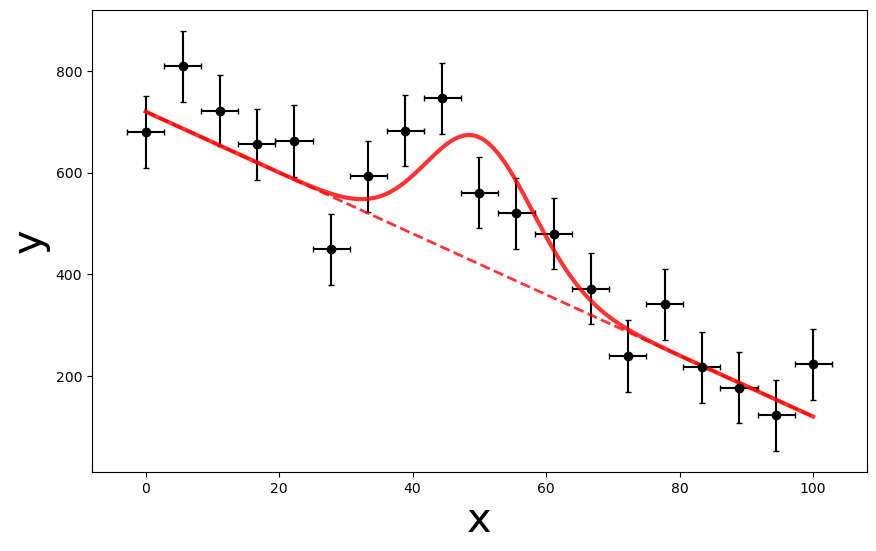

In [6]:
seed       = 76 #76 
npoints    = 19
true_a     = 5
xobs, yobs = simulate_obs(npoints, true_a, seed)

xerr = np.mean(xobs[1:]-xobs[:-1])/2

fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)


ax.errorbar(x=xobs, y=yobs, yerr=70 , xerr = xerr , c='black', capsize=2, fmt='o')

x_plot     = np.linspace(0, 100, 1000)
y_plot     = model(x_plot, true_a)
ax.plot(x_plot, y_plot, c='red', linewidth=3, alpha=.8)

y_plot     = model(x_plot, 0)
ax.plot(x_plot, y_plot, '--',linewidth=2,alpha=.8, c='red' )
ax.set_xlabel('x',fontsize=30)
ax.set_ylabel('y',fontsize=30)

### Let's plot the likelihood as a function of 'a'

Text(0, 0.5, 'Likelihood')

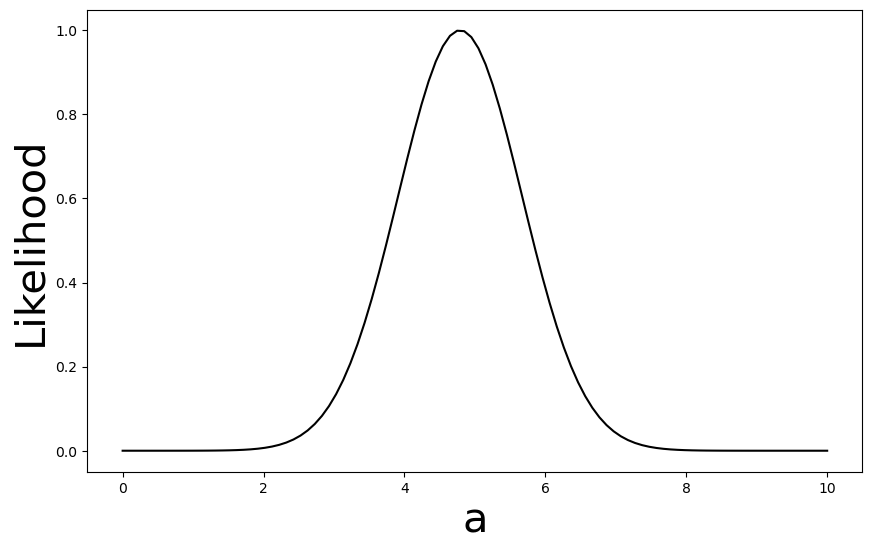

In [7]:
a_vals   = np.linspace(0,10, 500)
lkl_vals = [likelihood( a_i, yobs, xobs)  for a_i in a_vals]

# we perform an interpolation
def likelihood_interp(a):
    return np.interp( a,  a_vals, lkl_vals/np.max(lkl_vals))



fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)

x = np.linspace(0,10, 100)
y = likelihood_interp(x)
ax.plot( x, y, c='black')
ax.set_xlabel("a",fontsize=30)
ax.set_ylabel('Likelihood',fontsize=30)

 We now fit the model: we find the value $\bar{a}$ that maximize the likelihood

In [8]:
bar_a = optimize.fmin(lambda x: -likelihood_interp(x), 0)
bar_a

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 29
         Function evaluations: 58


array([4.7895625])

4.79 is the value of $a$ that maximex the likelihood!

### Likelihood ratio

In [9]:
likelihood_ratio = likelihood_interp(0)/likelihood_interp(bar_a)
likelihood_ratio

array([3.51983573e-07])

### Log-likelihood ratio folowwing Wilks' theorem

In [10]:
LogL = -2*np.log( likelihood_ratio )
LogL

array([29.71936266])

### p-value

In [11]:
p_value = 1 - chi2.cdf(LogL, df=1)
p_value

array([4.99335729e-08])

### sigma

In [12]:
special.erfinv( 1 - p_value ) * np.sqrt(2)

array([5.45154681])

In [13]:
np.sqrt(LogL)

array([5.45154681])

### CONCLUSION

The null hypothesis $a=0$ is excludede at 5.4 $\sigma$

### We now check the distribution of the statistic under the null and alternative hypothesis

In [33]:
%%time


a_vals     = np.linspace(-10,10, 1000)
    
TS_list_H0 = [ ]
TS_list_H1 = [ ]

def TS( a_vals, lkl_vals):
    guessed_a   = 0
    num         = np.interp( guessed_a, a_vals, lkl_vals )
    den         = np.max(    lkl_vals )
    return num/den

for i in range(200):
    
    # NULL HYPOTHEISIS H0
    a_hypothesis = 0
    xobs, yobs   = simulate_obs(npoints, a_hypothesis, i)
    lkl_vals     = [likelihood( a_i, yobs, xobs)  for a_i in a_vals]
    TS_H0        = TS( a_vals, lkl_vals)
    
    # ALTERNATIVE HYPOTHESIS H1
    a_hypothesis = 5
    xobs, yobs   = simulate_obs(npoints, a_hypothesis, i)
    lkl_vals     = [likelihood( a_i, yobs, xobs)  for a_i in a_vals]
    TS_H1        = TS( a_vals, lkl_vals)
    
    
    TS_list_H0.append( TS_H0 )
    TS_list_H1.append( TS_H1 )

CPU times: user 11min 38s, sys: 6.48 s, total: 11min 44s
Wall time: 11min 38s


### Distribution of the likelihood ratio

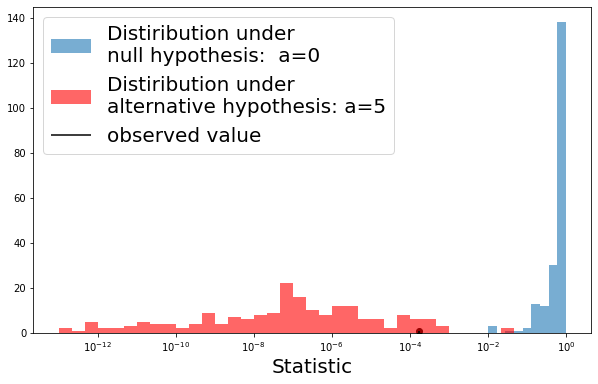

In [34]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)
bins = np.logspace(-2,0,10)
ax.hist( TS_list_H0, bins=bins, alpha=0.6 ,  label="Distiribution under\nnull hypothesis:  a=0" )

bins = np.logspace(-13,0,40)
ax.hist( TS_list_H1, bins=bins, alpha=0.6 ,color='red',label="Distiribution under\nalternative hypothesis: a=5" )
ax.set_xscale("log")
ax.set_xlabel("Statistic", fontsize=20)



xs = np.interp( 0, a_vals, lkl_vals/np.max(lkl_vals))
ys = 1
ax.vlines(xs, 0, ys , color='black', label="observed value")
ax.scatter(xs,ys, color='black')

ax.legend(loc='best', fontsize=20)

### Distribution of the -2 Log likelihood ratio

In [35]:
logTS_h0 = -2*np.log(TS_list_H0)
logTS_h1 = -2*np.log(TS_list_H1)

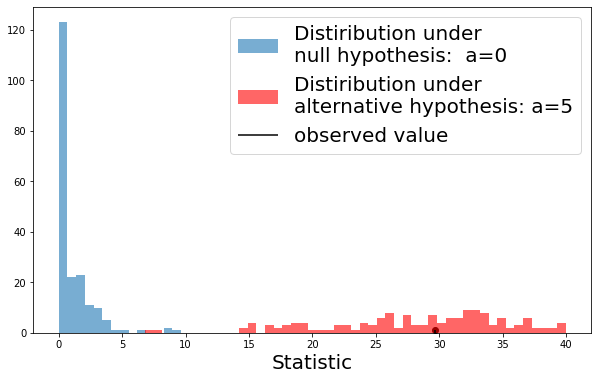

In [36]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)
bins = np.linspace(0,20,30)
ax.hist( logTS_h0, bins=bins, alpha=0.6 ,  label="Distiribution under\nnull hypothesis:  a=0" )

bins = np.linspace(0,40,60)
ax.hist( logTS_h1, bins=bins, alpha=0.6 ,color='red',label="Distiribution under\nalternative hypothesis: a=5" )
#ax.set_xscale("log")
ax.set_xlabel("Statistic", fontsize=20)



xs = 29.7
ys = 1
ax.vlines(xs, 0, ys , color='black', label="observed value")
ax.scatter(xs,ys, color='black')

ax.legend(loc='best', fontsize=20)

### Check if it follows a $\chi^2$ distribution

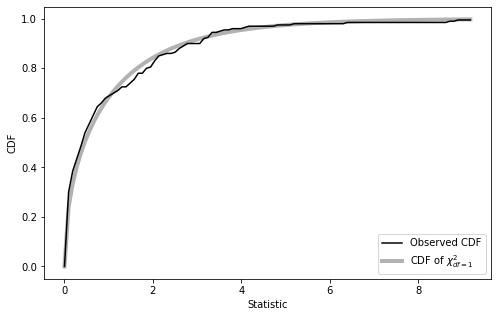

In [37]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

all_TS = -2*np.log(TS_list_H0)

DOF = 1 # Number of free parameters that have been fitted

min_TS      = 0 #np.min(TS_list)
max_TS      = np.max(all_TS)
TS_bins     = np.linspace(min_TS ,max_TS,100)
TS_CDF      = np.array([np.sum( all_TS  < i ) for i in TS_bins])/len(all_TS)
ax.plot(TS_bins, TS_CDF , color='black', label="Observed CDF")


Chi2_CDF = chi2.cdf(TS_bins, df=DOF )
ax.plot(TS_bins,Chi2_CDF, color='black',alpha=0.3, linewidth=4, label=r"CDF of $\chi^2_{df = "+str(DOF) +"}$")
ax.set_ylabel("CDF")
ax.set_xlabel("Statistic")
ax.legend(loc="lower right")

# On/Off problems

We firts define the log likelihood ratio for an On and Off observation.

In the `log_likelihood` function we must give in input the following variables

1. `s` the expected signal events
2. `Non` the total numbers of observed events in the ON region
3. `Noff` the total numbers of observed events in the OFF region
4. `a` is 'alpha' the ratio between the ON and OFF region

Given these inpunt the function will return

$ 2 \left[   N_{on} \log \left( \frac{N_{on}}{s+ \alpha \hat{b} } \right) + 
     N_{off} \log \left( \frac{N_{off}}{ \hat{b} } \right) \; +  \;  s+ (1+ \alpha) \hat{b} - N_{on} - N_{off} \right] $


In [15]:
def log_likelihood(s, Non, Noff, a):
    # we firts get the b that maximez the likelihood
    N     = Non + Noff - (1+1/a) *s
    b     = (N + np.sqrt( N**2  + 4* (1+1/a) *s*Noff ))/(2+2*a)
    
    # Now we can compute the tree terms of the likelihood
    if Non == 0:
        term1 = np.zeros_like(s)
    else:
        term1 = Non*np.log( Non/(s + a*b)  )

    if Noff == 0:
        term2 = np.zeros_like(s)
    else:
        term2 = Noff*np.log( Noff/b  )
 
    term3 = s + (1+a)*b - Non - Noff
    
    return 2*(term1 + term2 + term3)

Let's see an example

We first simulate an On/Off observation, where `true_s` and `true_b` are the value of signal and background used for the simulation

In [115]:
true_s = 20
true_b = 90
a = 0.5

#simulation
seed = 400
rng  = np.random.default_rng(seed)
Non  = rng.poisson(true_s + a * true_b)
print('Non  = ', Non)
Noff = rng.poisson(true_b)
print('Noff = ', Noff)

Non  =  57
Noff =  85


We now plot the log likelihood

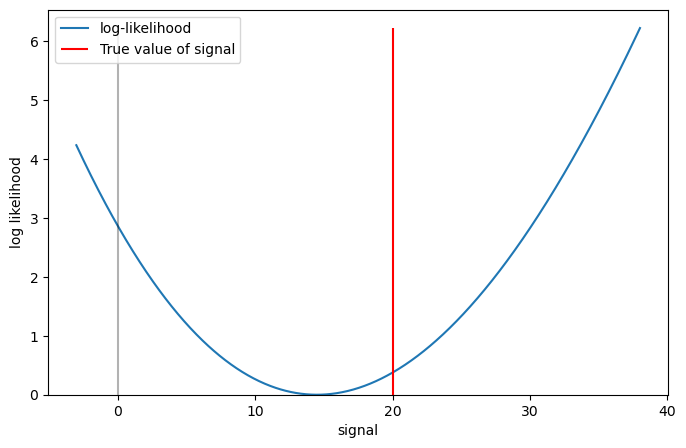

In [116]:
s     = np.linspace(-3,38, 1000)
log_l = log_likelihood(s, Non, Noff, a)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

ax.plot(s,log_l, label='log-likelihood')
ax.vlines( true_s, 0, np.max(log_l), color='red', label='True value of signal')
ax.vlines( 0, 0, np.max(log_l), color='black', alpha=0.3 )

ax.set_ylim( [0., None])
ax.set_ylabel('log likelihood')
ax.set_xlabel('signal')
ax.legend();

We can now get the fitted value of s

In [84]:
fitted_s = optimize.fmin(lambda x:  np.interp( x, s, log_l), 0)
fitted_s

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 36
         Function evaluations: 72


array([14.4835])

And obtain the statistic

In [85]:
statistic =  np.interp( true_s, s, log_l)
statistic

0.375792854936525

Such as statistic accoridng to the Wilks' theorem corrispon to a confidence level of

In [86]:
chi2.cdf(statistic, df=1)

0.46013652561557117

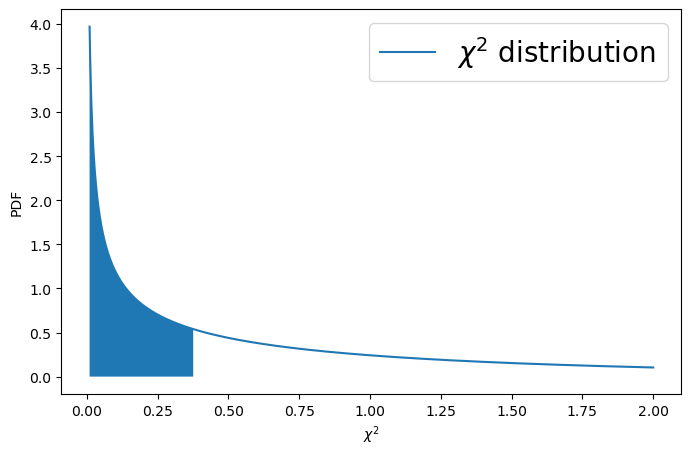

In [111]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

x = np.linspace(0.01, 2, 1000)
y = chi2.pdf(x, df=1)
ax.plot(x,y, label='$\chi^2$ distribution')

x = np.linspace(0.01, statistic, 1000)
y = chi2.pdf(x, df=1)

ax.fill_between(x,y, 0)
ax.set_ylabel('PDF')
ax.set_xlabel(r'$\chi^2$')
ax.legend(fontsize=30);

### Let's check if it is a $\chi^2$ variable

In [48]:
%%time
all_statistic = []

for i in range(10000):
 
    
    rng  = np.random.default_rng(i)
    Non  = rng.poisson(true_s + a * true_b)
    Noff = rng.poisson(true_b)
    
    s     = np.linspace(-3,38, 1000)
    log_l = log_likelihood(s, Non, Noff, a)

    statistic =  np.interp( true_s, s, log_l)
    
    all_statistic.append( statistic) 
    
all_statistic = np.array( all_statistic )

CPU times: user 871 ms, sys: 3.08 ms, total: 874 ms
Wall time: 875 ms


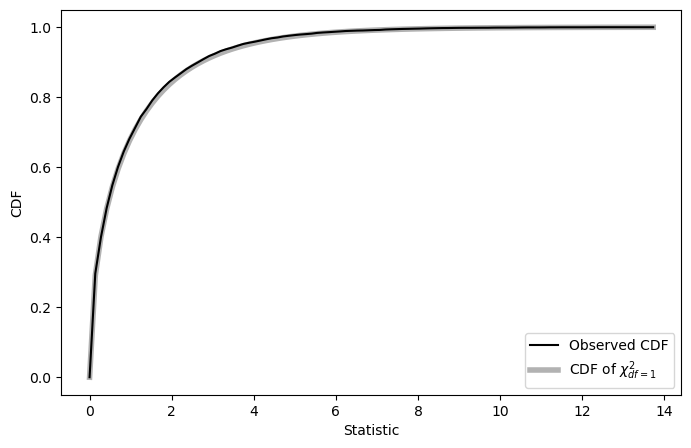

In [76]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

all_TS = all_statistic

DOF = 1 # Number of free parameters that have been fitted

min_TS      = 0 #np.min(TS_list)
max_TS      = np.max(all_TS)
TS_bins     = np.linspace(min_TS ,max_TS,100)
TS_CDF      = np.array([np.sum( all_TS  < i ) for i in TS_bins])/len(all_TS)
ax.plot(TS_bins, TS_CDF , color='black', label="Observed CDF")


Chi2_CDF = chi2.cdf(TS_bins, df=DOF )
ax.plot(TS_bins,Chi2_CDF, color='black',alpha=0.3, linewidth=4, label=r"CDF of $\chi^2_{df = "+str(DOF) +"}$")
ax.set_ylabel("CDF")
ax.set_xlabel("Statistic")
ax.legend(loc="lower right")

It follows indeed the expected distribution!

# Likelihood function for a given On/Off observation

Text(0.5, 0, 'signal')

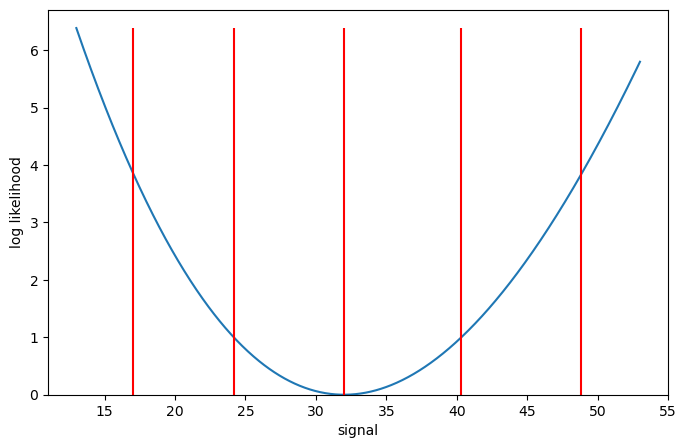

In [16]:
Non = 54
Noff = 44
a = 0.5

s     = np.linspace(13,53, 1000)
log_l = log_likelihood(s, Non, Noff, a)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

ax.plot(s,log_l, label='log-likelihood')

ax.vlines( 17.05, 0, np.max(log_l), color='red')
ax.vlines( 24.17, 0, np.max(log_l), color='red')
ax.vlines( 32.01, 0, np.max(log_l), color='red')
ax.vlines( 40.32, 0, np.max(log_l), color='red')
ax.vlines( 48.83, 0, np.max(log_l), color='red')

ax.set_ylim( [0., None])
ax.set_ylabel('log likelihood')
ax.set_xlabel('signal')

Let's see if the value $s$ that maximize the likelihood is indeed given by 

$ N_{on} - \alpha N_{off} $

In [17]:
Non - a*Noff 

32.0

In [24]:
max_s = optimize.fmin(lambda x:  np.interp( x, s, log_l) , 20)
max_s

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 24
         Function evaluations: 48


array([32.0189209])

Let's see if the 68% CL is weel approximated by 

$ N_{on} - \alpha N_{off} \pm   \sqrt{ N_{on} + \alpha^2 N_{off} } $

In [25]:
Non - a*Noff + np.sqrt( Non + a**2 * Noff)

40.06225774829855

In [27]:
high_s = optimize.fmin(lambda x:  (np.interp( x, s, log_l) -1)**2, 40)
high_s

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 32


array([40.32208252])

In [28]:
Non - a*Noff  - np.sqrt( Non + a**2 * Noff)

23.93774225170145

In [29]:
low_s = optimize.fmin(lambda x:  (np.interp( x, s, log_l) -1)**2, 20)
low_s

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 36


array([24.17407227])

Finally the 95% Upper and Low Limits

In [31]:
Non - a*Noff  + 2*  np.sqrt( Non + a**2 * Noff)

48.1245154965971

In [33]:
UL_s = optimize.fmin(lambda x:  (np.interp( x, s, log_l) -3.84)**2, 40)
UL_s

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 38


array([48.83343506])

In [34]:
Non - a*Noff  - 2*  np.sqrt( Non + a**2 * Noff)

15.875484503402902

In [35]:
LL_s = optimize.fmin(lambda x:  (np.interp( x, s, log_l) -3.84)**2, 20)
LL_s

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 34


array([17.05847168])

# Li&Ma significance

We firts define a function that gives us the Li&Ma significance given the On and off counts (`a` si $\alpha$ the normalization between the On and Off region)

$ \pm \sqrt{2}  \left[  
   N_{on} \log\left( \frac{1 }{\alpha} \frac{(\alpha +1) N_{on}}{N_{on} + N_{off}} \right)  +
    N_{off} \log\left(  \frac{(\alpha +1 ) N_{off}}{N_{on} + N_{off}} \right) \right]^{1/2}
$

In [36]:
def LiMa_significance( Non, Noff, a):
    plus_or_minus = np.sign( Non - a*Noff)
    log_lkl_null  = log_likelihood( s=0, Non=Non, Noff=Noff, a=a)
    return plus_or_minus * np.sqrt( log_lkl_null)

Simulation of observation in each of which we get the Li&Ma significance

In [44]:
true_s = 0
true_b = 90
a      = 1/3

all_significance = []
for i in range(10000):
 
    
    rng  = np.random.default_rng(i)
    Non  = rng.poisson(true_s + a * true_b)
    Noff = rng.poisson(true_b)
    
    all_significance.append( LiMa_significance( Non, Noff, a) )
    
    
all_significance = np.array(all_significance)

We plot the result and check the distribution

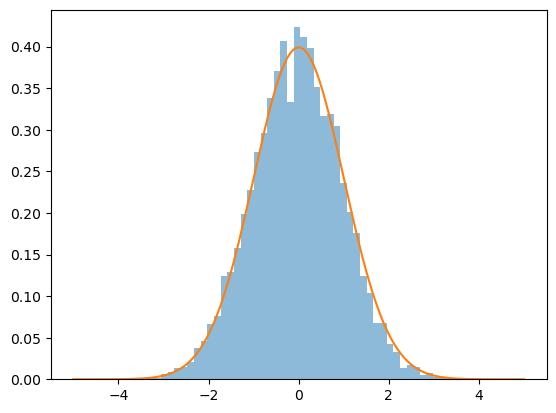

In [50]:
plt.hist(all_significance,bins=50, density=True, alpha=0.5);
x = np.linspace( -5, 5, 1000)
y = stats.norm.pdf( x, 0,1)
plt.plot(x,y)

It very nicely follows a normal distribution